In [28]:
# Load csv
import pandas as pd

# Scaling the data
from sklearn.preprocessing import StandardScaler

# Import KMeans clustering algorithm
from sklearn.cluster import KMeans

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate Random Forest Model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

# For visualization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ----------------------------------------------------
# Step 1: Load dataset and keep only relevant columns
# ----------------------------------------------------
df = pd.read_csv("fifa_full_with_clusters.csv")

In [3]:
# ----------------------------------------------------
# Step 1: Define X (features) and y (target)
# ----------------------------------------------------

X = df[['AbilityScore', 'CostScore']]
Y= df['Cluster']

In [4]:
# ----------------------------------------------------
# Step 2: Scale the features
# ----------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# ----------------------------------------------------
# Step 3: Split the data into training and testing sets
# ----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [33]:
# ----------------------------------------------------
# Step 4: Train a KNN classifier and predict
# ----------------------------------------------------

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [34]:
# ----------------------------------------------------
# Step 5: Accuracy, precision, recall, F1-score
# ----------------------------------------------------

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n--- Model Evaluation (KNN) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")


--- Model Evaluation (KNN) ---
Accuracy: 0.9997
Precision (Weighted): 0.9997
Recall (Weighted): 0.9997
F1-Score (Weighted): 0.9997


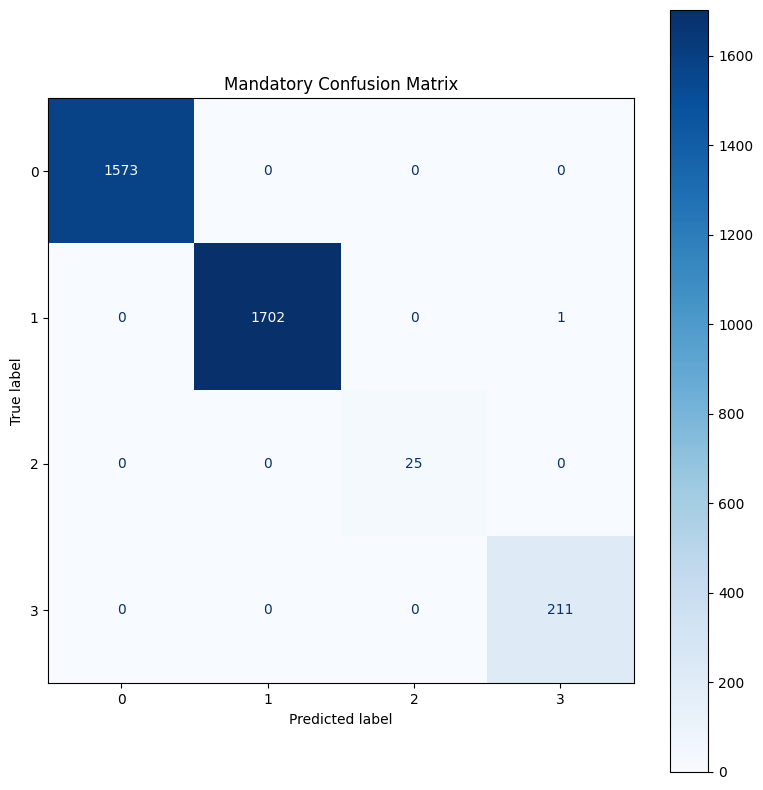

In [35]:
# ----------------------------------------------------
# Step 6: Confusion matrix
# ----------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Mandatory Confusion Matrix')
plt.tight_layout()


Random Forest Accuracy: 0.9994
Random Forest F1-Score: 0.9994


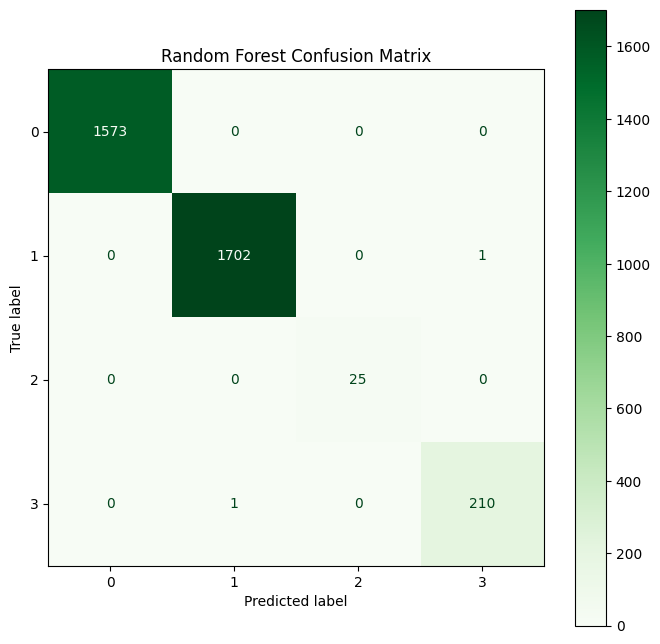

In [37]:
# ----------------------------------------------------
# Step 7: Random Forest Classifier
# ----------------------------------------------------

# Initialize the model with 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the same scaled training data
rf_model.fit(X_train, y_train)



print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")

# Visualize the Confusion Matrix for the Random Forest model
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# Make predictions
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted', zero_division=0)
rf_cm = confusion_matrix(y_test, rf_y_pred)